# healpy官方说明

196608
0.45806485490898746


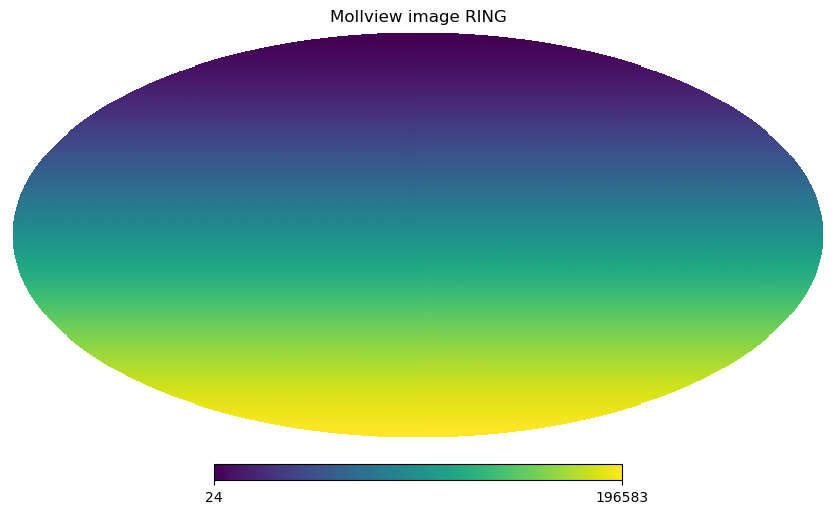

In [1]:
import healpy as hp
import numpy as np
from astropy.coordinates import SkyCoord

nside = 128

# pixel数量
npix = hp.nside2npix(nside)
print(npix)
# 空间分辨率
print(hp.nside2resol(nside,arcmin=True)/60)

# 绘图
m = np.arange(npix)
ra = 74.0563449685417
dec = -34.155241212932374
# turn icrs to gal
cencoor = SkyCoord(ra=ra,dec=dec,unit='deg',frame='icrs')
galc = cencoor.transform_to('galactic')
gall, galb = galc.l.degree, galc.b.degree
radius = 300/3600
ipix_disc = hp.query_disc(nside=nside,vec=hp.ang2vec(gall,galb, lonlat=True),radius=np.radians(radius))
m[ipix_disc] = m.max()
hp.mollview(m,title='Mollview image RING')

In [7]:
np.radians(radius)

0.001454441043328608

In [51]:
ipix_list = list()
ipix_list.append(hp.ang2pix(nside,gall,galb,lonlat=True))
ipix_list

[158800]

In [15]:
gall,galb

(236.60261950183622, -37.650599873164595)

# 新仿真星表的healpix分布绘图

In [ ]:
from astropy.table import Table

import astropy.units as u
import pandas
import os
import matplotlib.pyplot as plt
import time


start = time.time()
root = '/media/hyz/travaller/CSSTsim/CSSTsim.20211214.pSDSSpPS1'

id_list = list()
loc_list = np.empty((0,2))
i = 0
for f in os.listdir(root):
    if f.endswith('.fits'):
        i += 1
        t = Table.read(os.path.join(root,f))
        t = t.to_pandas()
        t_locm = t[['gall','galb']].mean().to_numpy()
        # print(loc_list,t_locm)
        loc_list = np.vstack([loc_list,t_locm])
        # print(loc_list)
        id_list.append(int(f.split('_128_')[1].split('.fits')[0]))
        dur = time.time() - start
        dur = '%02d:%02d:%02d' % (dur//3600, (dur%3600)//60, dur%60)
        n_mark = 50
        bar = '[' + round(i/196608*n_mark) * '>' + (n_mark-round(i/196608*n_mark)) * '-' + ']'
        processbar = '\rfile: %s/196608  '%i + 'running: ' + bar.ljust(20) + dur
        print(processbar, flush=True, end='')
        
loc_list = np.array(loc_list)
np.save('./floc.list',loc_list)
np.save('./fid.list',id_list)

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(loc_list[:,0],loc_list[:,1],c=id_list,s=1)
ax.colorbar()

因为能解码（nest=True），所以这步无用了

# 新仿真星表极限星等统计

<Figure size 2000x1000 with 0 Axes>

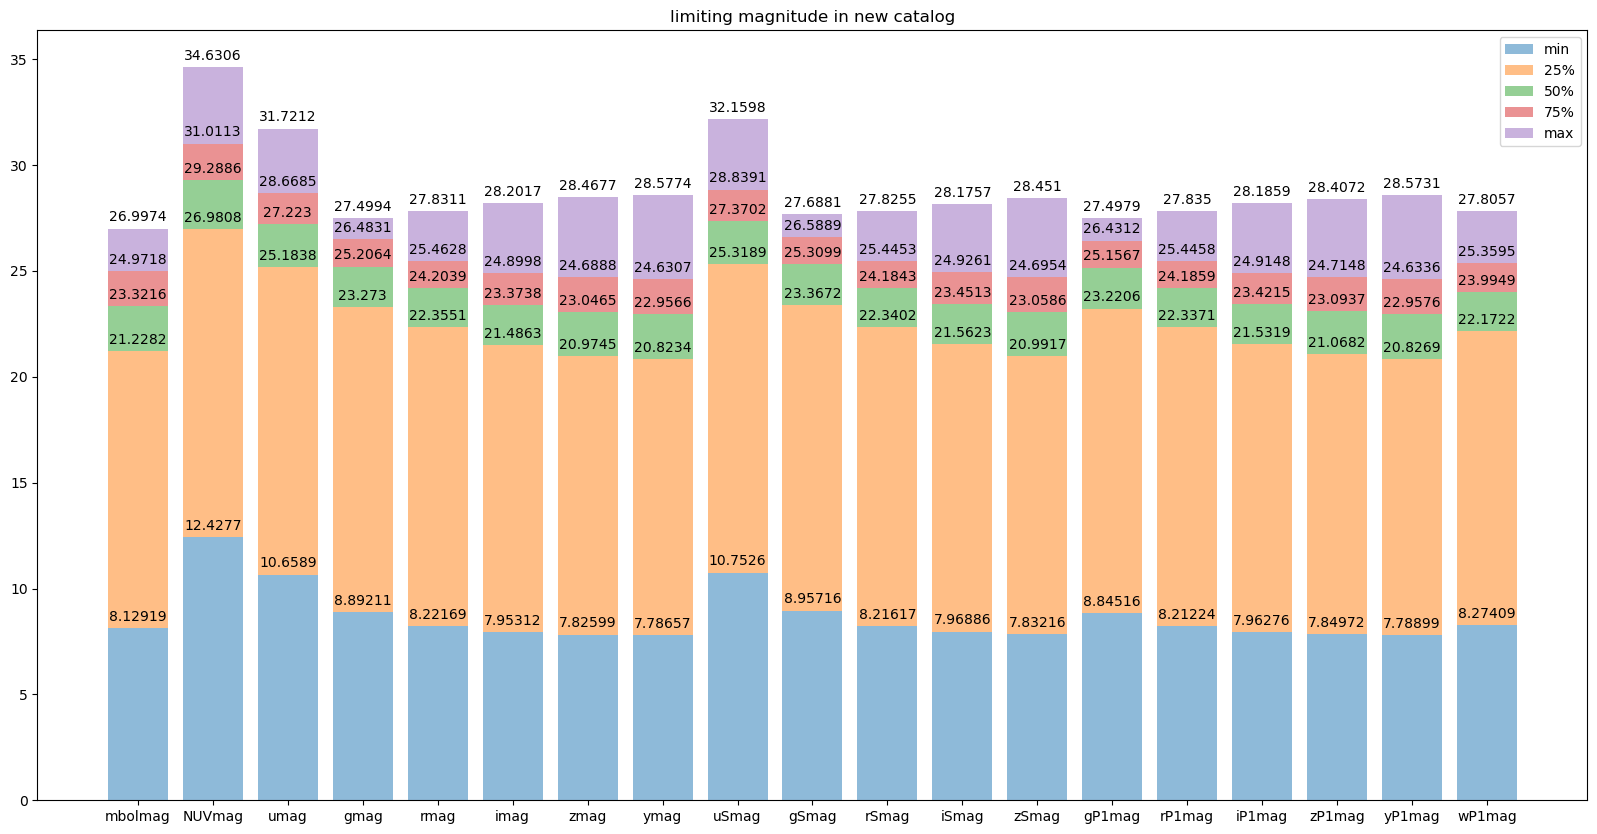

In [23]:
ipix_list=[158800]
for i in ipix_list:
   f = f'triout_128_{i}.fits'
   t = Table.read(os.path.join(root,f))
   t = t.to_pandas()
   dd = t[['mbolmag', 'NUVmag', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'ymag',\
      'uSmag', 'gSmag', 'rSmag', 'iSmag', 'zSmag', 'gP1mag', 'rP1mag',\
      'iP1mag', 'zP1mag', 'yP1mag', 'wP1mag']].describe()
   import matplotlib.pyplot as plt
   plt.figure(figsize=(20,10))
   fig,ax = plt.subplots(figsize=(20,10))
   plt.title('limiting magnitude in new catalog')
   dddict = {'min':dd.loc['min',:],
            '25%':dd.loc['25%',:],
            '50%':dd.loc['50%',:],
            '75%':dd.loc['75%',:],
            'max':dd.loc['max',:],
            }
   temp_count = 0
   for boolean,weight_count in dddict.items():
      count = weight_count - temp_count
      rects = ax.bar(['mbolmag', 'NUVmag', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'ymag',\
      'uSmag', 'gSmag', 'rSmag', 'iSmag', 'zSmag', 'gP1mag', 'rP1mag',\
      'iP1mag', 'zP1mag', 'yP1mag', 'wP1mag'],
            count,alpha=0.5,label=boolean,bottom=temp_count)
      ax.bar_label(rects,padding=3)
      ax.legend()
      temp_count = weight_count


In [19]:
dddict['min']

mbolmag     8.129190
NUVmag     12.427725
umag       10.658929
gmag        8.892105
rmag        8.221687
imag        7.953121
zmag        7.825994
ymag        7.786566
uSmag      10.752636
gSmag       8.957155
rSmag       8.216174
iSmag       7.968862
zSmag       7.832164
gP1mag      8.845163
rP1mag      8.212240
iP1mag      7.962755
zP1mag      7.849722
yP1mag      7.788991
wP1mag      8.274090
Name: min, dtype: float64

In [57]:
dd.loc['min':'max',:]

,mbolmag,NUVmag,umag,gmag,rmag,imag,zmag,ymag,uSmag,gSmag,rSmag,iSmag,zSmag,gP1mag,rP1mag,iP1mag,zP1mag,yP1mag,wP1mag
min,8.129190,12.427725,10.658929,8.892105,8.221687,7.953121,7.825994,7.786566,10.752636,8.957155,8.216174,7.968862,7.832164,8.845163,8.212240,7.962755,7.849722,7.788991,8.274090
25%,21.228241,26.980833,25.183753,23.272982,22.355077,21.486342,20.974483,20.823356,25.318869,23.367228,22.340242,21.562293,20.991689,23.220646,22.337077,21.531878,21.068150,20.826886,22.172205
50%,23.321589,29.288592,27.222985,25.206368,24.203941,23.373847,23.046528,22.956613,27.370184,25.309874,24.184276,23.451317,23.058638,25.156701,24.185865,23.421528,23.093718,22.957565,23.994931
75%,24.971757,31.011342,28.668536,26.483054,25.462755,24.899805,24.688777,24.630687,28.839089,26.588940,25.445281,24.926125,24.695374,26.431166,25.445827,24.914836,24.714754,24.633562,25.359462
max,26.997425,34.630634,31.721222,27.499361,27.831120,28.201698,28.467720,28.577358,32.159763,27.688089,27.825516,28.175684,28.451012,27.497944,27.835020,28.185886,28.407169,28.573126,27.805748


In [8]:
from astropy.table import Table

sim = Table.read('/media/hyz/travaller/CSSTsim/CSSTsim.20211214.pSDSSpPS1/triout_128_170801.fits')
sim = sim.to_pandas()


<AxesSubplot:ylabel='Frequency'>

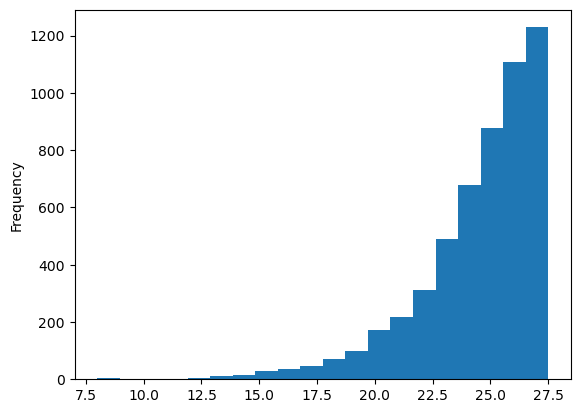

In [4]:
sim['gmag'].plot.hist(bins=20)

'pp'

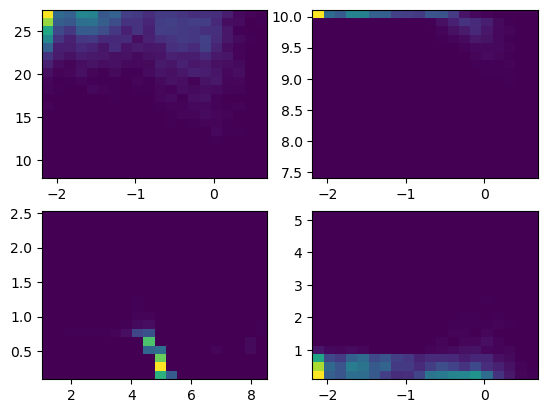

In [10]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.hist2d(sim['M_H'],sim['gmag'],bins=(20,20))
plt.subplot(222)
plt.hist2d(sim['M_H'],sim['logAge'],bins=(20,20))
plt.subplot(223)
plt.hist2d(sim['logg'],sim['Mass'],bins=(20,20))
plt.subplot(224)
plt.hist2d(sim['M_H'],sim['m_ini'],bins=(20,20))
'pp'

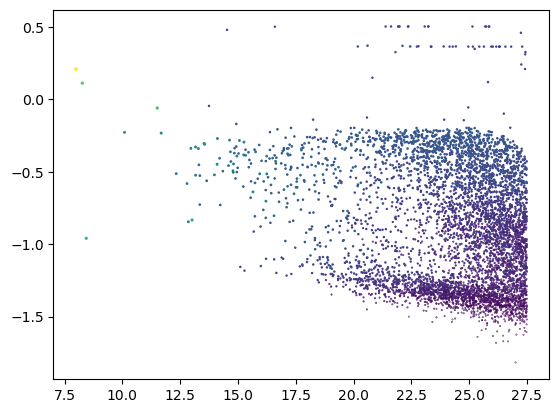

In [11]:
plt.scatter(sim['gmag'],sim['rmag']-sim['gmag'],c=sim['Mass'],s=sim['Mass'])

奇怪的赫罗图。。。

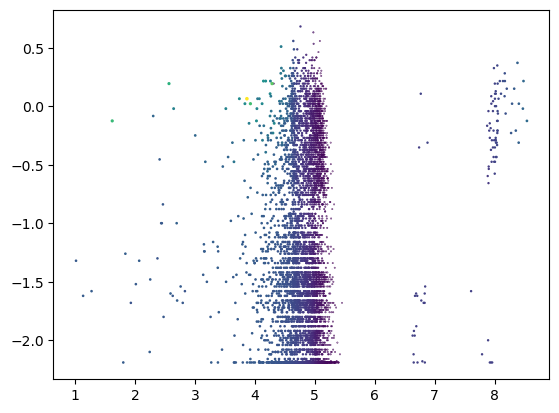

In [11]:
plt.scatter(sim['logg'],sim['M_H'],c=sim['Mass'],s=sim['Mass'])

(0.0, 1.0)

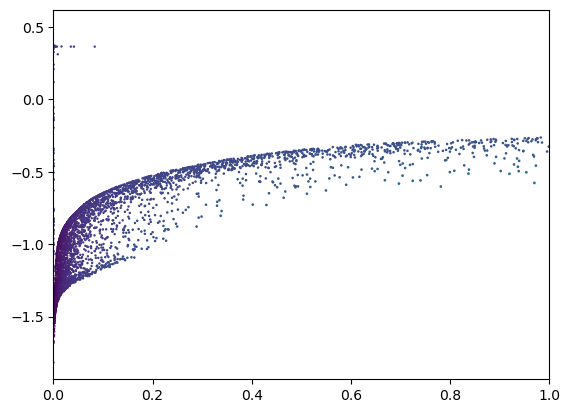

In [21]:
plt.scatter(10**sim['logL'],sim['rmag']-sim['gmag'],c=sim['Mass'],s=sim['Mass'])
plt.xlim(0,1)

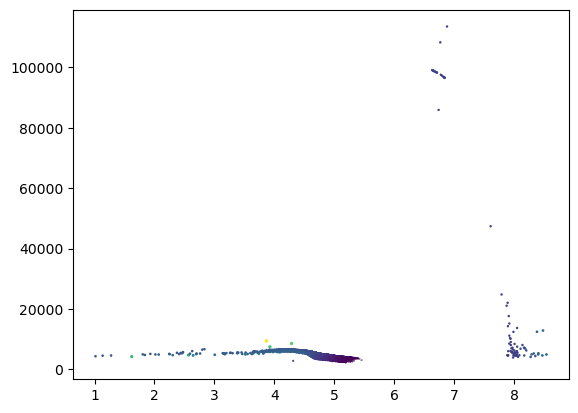

In [17]:
plt.scatter(sim['logg'],10**sim['logTe'],c=sim['Mass'],s=sim['Mass'])

(1.2, 5.2)

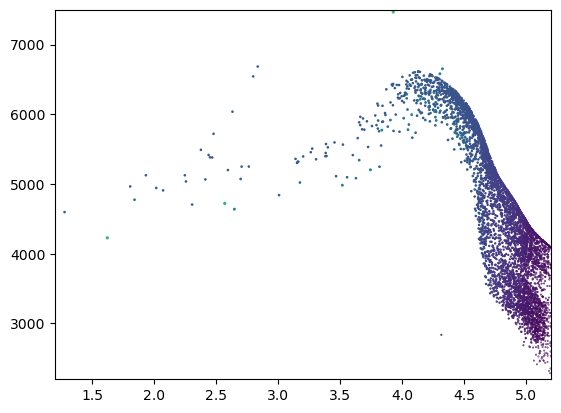

In [19]:
plt.scatter(sim['logg'],10**sim['logTe'],c=sim['Mass'],s=sim['Mass'])
plt.ylim(2200,7500)
plt.xlim(1.2,5.2)

In [5]:
sim.columns

Index(['Gc', 'logAge', 'M_H', 'm_ini', 'mu0', 'Av', 'mratio', 'Mass', 'logL',
       'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1',
       'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z',
       'mbolmag', 'NUVmag', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'ymag',
       'uSmag', 'gSmag', 'rSmag', 'iSmag', 'zSmag', 'gP1mag', 'rP1mag',
       'iP1mag', 'zP1mag', 'yP1mag', 'wP1mag', 'velU', 'velV', 'velW', 'Vrad',
       'PMracos', 'PMdec', 'gall', 'galb'],
      dtype='object')

In [16]:
10**sim['logTe'].describe()

count             inf
mean     4.359716e+03
std      1.358143e+00
min      2.286476e+03
25%      3.606055e+03
50%      4.270963e+03
75%      5.176252e+03
max      1.134975e+05
Name: logTe, dtype: float64

Gc:
logAge: log年龄
M_H: 金属丰度
m_ini: 初始质量？
mu0
Av
mratio
Mass: 质量
logL: log光度？
logTe: log有效温度？
logg: 表面重力

'Gc', 'logAge', 'M_H', 'm_ini', 'mu0', 'Av', 'mratio', 'Mass', 'logL',
       'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1',
       'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z',
       'mbolmag', 'NUVmag', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'ymag',
       'uSmag', 'gSmag', 'rSmag', 'iSmag', 'zSmag', 'gP1mag', 'rP1mag',
       'iP1mag', 'zP1mag', 'yP1mag', 'wP1mag', 'velU', 'velV', 'velW', 'Vrad',
       'PMracos', 'PMdec', 'gall', 'galb'

In [22]:
sim['Gc']

0       1
1       1
2       1
3       1
4       1
       ..
5395    3
5396    3
5397    3
5398    3
5399    3
Name: Gc, Length: 5400, dtype: int16